In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from copy import copy
params = {
   'axes.labelsize': 10,
   'font.size': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'axes.titlesize': 10,
   'text.usetex': True,
   'font.family':'serif',
   'font.serif':'Computer Modern'
   }
matplotlib.rcParams.update(params)
matplotlib.rcParams["font.serif"] = "Computer Modern Roman"
matplotlib.rcParams["font.family"] = "Serif"
matplotlib.rcParams['text.latex.preamble'] = r'\renewcommand{\mathdefault}[1][]{}'

from matplotlib.markers import MarkerStyle
import matplotlib as mpl

In [1]:
import GWPhotonCounting
import jax.numpy as jnp

frequencies = jnp.sort(jnp.fft.fftfreq(2**13, d=1/1e4))

detector_nosqz = GWPhotonCounting.detector.Detector(
    frequencies, '/home/ethan.payne/projects/GWPhotonCounting/examples/data/CE_shot_psd_nosqz.csv', 
    '/home/ethan.payne/projects/GWPhotonCounting/examples/data/CE_classical_psd.csv', 
    gamma=100, random_seed=1632, N_frequency_spaces=10)

detector_sqz = GWPhotonCounting.detector.Detector(
    frequencies, '/home/ethan.payne/projects/GWPhotonCounting/examples/data/CE_total_psd_sqz.csv', None, 
    gamma=100, random_seed=1632, N_frequency_spaces=10)

/home/ethan.payne/code_libraries/bilby/bilby/gw/detector/geometry.py:5: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import ROT_DAY, DAYJUL_SI
/home/ethan.payne/.conda/envs/ve310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
jnp.mean(detector_nosqz.noise_photon_expectation) * 10**2

Array(0.05471978, dtype=float64)

In [4]:
LorentzianModel = GWPhotonCounting.signal.PostMergerLorentzian()
KNNModel = GWPhotonCounting.signal.PostMergerKNN(knn_file_path='/home/ethan.payne/code_libraries/apr4_knn_gw_model_2024/KNN_Models/APR4-knn_model-N100')

# Generating the strain signal
from bilby_cython.geometry import frequency_dependent_detector_tensor
import numpy as np

mtot = 2.5
phi0 = 0
z = 0.03
ra = 0.0
dec = 0.3
iota=0.2
psi = 0


PM_strain = KNNModel.generate_strain(detector_nosqz, frequencies, mtot, phi0, z, ra, dec, iota, psi)

expected_signal_photon_count = detector_nosqz.calculate_signal_photon_expectation(PM_strain, frequencies)

print(np.max(expected_signal_photon_count))

/home/ethan.payne/.conda/envs/ve310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


0.24001770278494963


In [5]:
import jax.numpy as jnp
import arviz as az

pc_data = []
strain_data = []

for i in range(9):
    pc_data.append(az.from_netcdf(f'result_noise_scaling_250417f/pc_noise_scale_{i}.nc').posterior.f0.values.flatten())
    strain_data.append(az.from_netcdf(f'result_noise_scaling_250417f/strain_noise_scale_{i}.nc').posterior.f0.values.flatten())

In [6]:
import corner

def rgba_to_hex(rgba):
    """Converts an RGBA tuple to a hex string.

    Args:
        rgba: A tuple representing the RGBA color (e.g., (255, 0, 0, 255)).

    Returns:
        A hex string representing the color (e.g., "#ff0000ff").
    """
    r, g, b, a = np.array(jnp.array(rgba)*255, dtype=int)
    return "#{:02x}{:02x}{:02x}{:02x}".format(r, g, b, a)

#ff7100ff 4 4
#008eb8ff 4 4


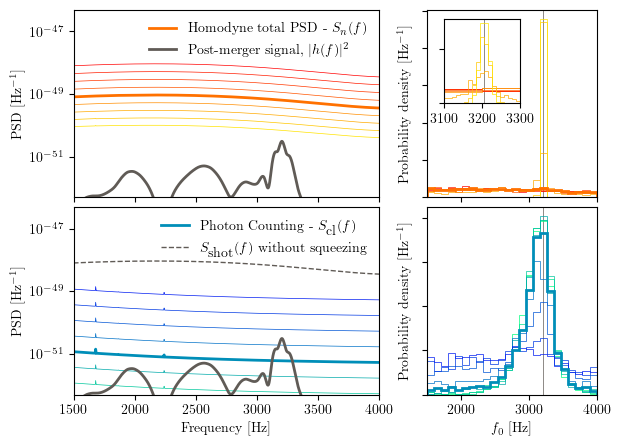

In [7]:
# Building the colormaps
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

params = {
   'axes.labelsize': 10,
   'font.size': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'axes.titlesize': 10,
   'text.usetex': True,
   'font.family':'serif',
   'font.serif':'Computer Modern'
   }
matplotlib.rcParams.update(params)
matplotlib.rcParams["font.serif"] = "Computer Modern Roman"
matplotlib.rcParams["font.family"] = "Serif"
matplotlib.rcParams['text.latex.preamble'] = r'\renewcommand{\mathdefault}[1][]{}'

colors = ['C1', (0,0,0)] # first color is black, last is red
cmap_homodyne = plt.get_cmap('autumn')#LinearSegmentedColormap.from_list("Homodyne", colors, N=5)

colors = [(0.9,0.9,0.9), 'navy'] # first color is black, last is red
cmap_pc = plt.get_cmap('winter')#LinearSegmentedColormap.from_list("PhotonCounting", colors, N=5)

fmin = 1.5e3
fmax = 4e3
bins = 25

fig, ax = plt.subplots(2,2, figsize=(6.75, 5), gridspec_kw={'hspace': 0.05, 'wspace': 0.2, 'width_ratios': [1.8, 1], 'height_ratios': [1, 1]}, sharex=False)


axin = ax[0,1].inset_axes([0.1, 0.5, 0.45, 0.45])

for idx, i in enumerate(range(9)):

    factor = 10**(-jnp.linspace(0,20,9)/10)[i]

    if factor != 0.1:
        ax[0,0].semilogy(frequencies, factor*detector_nosqz.shot_noise_psd + detector_nosqz.classical_noise_psd, color=cmap_homodyne(idx/9), lw=0.5)
        ax[0,1].hist(strain_data[i], bins=jnp.linspace(fmin, fmax, bins), density=True, histtype='step', color=cmap_homodyne(idx/9), lw=0.5)

        if i < 6: bins_in = 3 
        else: bins_in = 20
        axin.hist(strain_data[i], bins=jnp.linspace(3.1e3, 3.3e3, bins_in), density=True, histtype='step', color=cmap_homodyne(idx/9), lw=0.5)

    else:
        ax[0,0].semilogy(frequencies, factor*detector_nosqz.shot_noise_psd + detector_nosqz.classical_noise_psd, color=cmap_homodyne(idx/9), lw=2, label=r'Homodyne total PSD - $S_{n}(f)$')
        ax[0,1].hist(strain_data[i], bins=jnp.linspace(fmin, fmax, bins), density=True, histtype='step', color=cmap_homodyne(idx/9), lw=2, zorder=2.5)

        print(rgba_to_hex(cmap_homodyne(idx/9)), i, idx)

        if i < 6: bins_in = 3
        else: bins_in = 20
        axin.hist(strain_data[i], bins=jnp.linspace(3.1e3, 3.3e3, bins_in), density=True, histtype='step', color=cmap_homodyne(idx/9), lw=0.5)


for idx, i in enumerate(range(9)):

    factor = jnp.logspace(-2,2,9)[i]

    if factor != 1:
        ax[1,0].semilogy(frequencies, factor*detector_nosqz.classical_noise_psd, color=cmap_pc(1-idx/9), lw=0.5)
        ax[1,1].hist(pc_data[i], bins=jnp.linspace(fmin, fmax, bins), density=True, histtype='step', color=cmap_pc(1-(idx)/9), lw=0.5)
    else:
        ax[1,0].semilogy(frequencies, factor*detector_nosqz.classical_noise_psd, color=cmap_pc(1-idx/9), lw=2, label=r'Photon Counting - $S_\textrm{cl}(f)$')
        ax[1,1].hist(pc_data[i], bins=jnp.linspace(fmin, fmax, bins), density=True, histtype='step', color=cmap_pc(1-(idx)/9), lw=2,zorder=2.5)

        print(rgba_to_hex(cmap_pc(1-idx/9)), i, idx)

ax[1,0].semilogy(frequencies, detector_nosqz.shot_noise_psd, color='#605B56', lw=1, label=r'$S_\textrm{shot}(f)$ without squeezing', ls="--")

ax[0,0].plot(frequencies, np.abs(PM_strain)**2, color='#605B56', lw=2, label=r'Post-merger signal, $|h(f)|^2$')
ax[1,0].plot(frequencies, np.abs(PM_strain)**2, color='#605B56', lw=2)

ax[0,1].axvline(np.abs(frequencies[np.argmax(np.abs(PM_strain))]), color='#605B56', lw=0.5, ls='-', zorder=-1)
ax[1,1].axvline(np.abs(frequencies[np.argmax(np.abs(PM_strain))]), color='#605B56', lw=0.5, ls='-', zorder=-1)
axin.axvline(np.abs(frequencies[np.argmax(np.abs(PM_strain))]), color='#605B56', lw=0.5, ls='-', zorder=-1)

ax[0,0].legend(loc='upper right', frameon=False)
ax[1,0].legend(loc='upper right', frameon=False)


ax[0,0].set_xlim(1.5e3, 4e3)
ax[1,0].set_xlim(1.5e3, 4e3)

ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[1,1].set_yticklabels([])
axin.set_yticklabels([])

ax[0,1].set_xlim(fmin, fmax)
ax[1,1].set_xlim(fmin, fmax)
ax[0,0].set_ylim(5e-53, 5e-47)
ax[1,0].set_ylim(5e-53, 5e-47)
axin.set_xlim(3.1e3, 3.3e3)

ax[1,0].set_xlabel(r'Frequency [Hz]')
ax[1,1].set_xlabel(r'$f_0$ [Hz]')
ax[0,0].set_ylabel(r'PSD [Hz$^{-1}$]')
ax[1,0].set_ylabel(r'PSD [Hz$^{-1}$]')
ax[0,1].set_ylabel(r'Probability density [Hz$^{-1}$]')
ax[1,1].set_ylabel(r'Probability density [Hz$^{-1}$]')

fig.savefig('figure_noise_scaling_one_photon.pdf', bbox_inches='tight')

In [8]:
pc_data_photons = []

for n in np.linspace(0,4,5, dtype=int):
    pc_data_photons.append(az.from_netcdf(f'result_photon_scaling_250421/pc_{n}.nc'))

<Figure size 640x480 with 0 Axes>

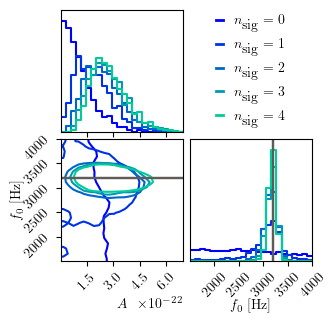

In [34]:
plt.clf()
fig = plt.figure(figsize=(3.375, 3.375))

for i in range(5):
    if i == 0:
        corner.corner(np.array([pc_data_photons[i].posterior.A.values.flatten(), pc_data_photons[i].posterior.f0.values.flatten()]).T, fig=fig,
                            fill_contours=False, plot_density=False, plot_contours=True, levels=[0.9], plot_datapoints=False, color=rgba_to_hex(cmap_pc(i/5)), smooth=0.9,
                            bins=(np.linspace(0,7e-22,25), np.linspace(1500,4000,25)), labels=[r'$A$', r'$f_0$ [Hz]'], smooth1d=0, 
                            truths=[None, np.abs(frequencies[np.argmax(np.abs(PM_strain))])], truth_color='#605B56', truth_linewidth=0.5)
    else:
        corner.corner(np.array([pc_data_photons[i].posterior.A.values.flatten(), pc_data_photons[i].posterior.f0.values.flatten()]).T,
                       fill_contours=False, plot_density=False, plot_contours=True, levels=[0.9], fig=fig, plot_datapoints=False, color=rgba_to_hex(cmap_pc(i/5)), smooth=0.9,
                            bins=(np.linspace(0,7e-22,25), np.linspace(1500,4000,25)), labels=[r'$A$', r'$f_0$ [Hz]'], smooth1d=0, 
                            truths=[None, np.abs(frequencies[np.argmax(np.abs(PM_strain))])], truth_color='#605B56', truth_linewidth=0.5)
        
axes = fig.get_axes()

axes[0].set_xlim(0, 7e-22)
axes[0].set_ylim(0,)
axes[2].set_xlim(0, 7e-22)
axes[2].set_ylim(1500, 4000)
axes[3].set_xlim(1500, 4000)
axes[3].set_ylim(0,)

legend_handles = []

for i in range(5):
    legend_handles.append(Line2D([0], [0], color=rgba_to_hex(cmap_pc(i/5)), lw=2, label=r'$n_{\textrm{sig}} = $ '+str(int(i))))

axes[1].legend(handles=legend_handles, loc='center', frameon=False, handlelength=0.5, ncol=1)

#axes[3].axvline(np.abs(frequencies[np.argmax(np.abs(PM_strain))]), color='k', lw=0.5, ls='-', zorder=-1)

fig.savefig('figure_photon_scaling_one_photon.pdf', bbox_inches='tight')

In [10]:
pc_data_snr = []
strain_data_snr = []

for i in [0,1]:
    pc_data_snr.append(az.from_netcdf(f'result_high_low_snr_250422d/pc_snr_scaling_{i}.nc'))
    strain_data_snr.append(az.from_netcdf(f'result_high_low_snr_250422d/strain_snr_scaling_{i}.nc'))

pc_data = [
    np.concatenate([pc_data_snr[0].posterior.A.values.flatten(), pc_data_snr[1].posterior.A.values.flatten()]),
    np.concatenate([pc_data_snr[0].posterior.f0.values.flatten(), pc_data_snr[1].posterior.f0.values.flatten()])]

<Figure size 640x480 with 0 Axes>

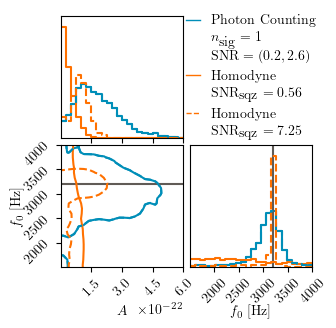

In [33]:
plt.clf()
fig = plt.figure(figsize=(3.375, 3.375))

ls = ['-', '--']

for i in range(2):

    if i == 0:
        corner.corner(np.array(pc_data).T, fig=fig,
                            fill_contours=False, plot_density=False, plot_contours=True, levels=[0.9], plot_datapoints=False, color='#008eb8ff', smooth=0.9,
                            bins=(np.linspace(0,6e-22,25), np.linspace(1500,4000,25)), labels=[r'$A$', r'$f_0$ [Hz]'], smooth1d=0, hist_kwargs={'linestyle': ls[i]},
                            truths=[None, np.abs(frequencies[np.argmax(np.abs(PM_strain))])], truth_color='#605B56',contour_kwargs={'linestyles': ls[i]})
    else:
        corner.corner(np.array(pc_data).T, fig=fig,
                            fill_contours=False, plot_density=False, plot_contours=True, levels=[0.9], plot_datapoints=False, color='#008eb8ff', smooth=0.9,
                            bins=(np.linspace(0,6e-22,25), np.linspace(1500,4000,25)), labels=[r'$A$', r'$f_0$ [Hz]'], smooth1d=0, hist_kwargs={'linestyle': ls[i]},contour_kwargs={'linestyles': ls[i]})
    
    corner.corner(np.array([strain_data_snr[i].posterior.A.values.flatten(), strain_data_snr[i].posterior.f0.values.flatten()]).T,
                    fill_contours=False, plot_density=False, plot_contours=True, levels=[0.9], fig=fig, plot_datapoints=False, color='#ff7100ff', smooth=0.9,
                        bins=(np.linspace(0,6e-22,25), np.linspace(1500,4000,25)), labels=[r'$A$', r'$f_0$ [Hz]'], smooth1d=0, hist_kwargs={'linestyle': ls[i]},contour_kwargs={'linestyles': ls[i]})
        
axes = fig.get_axes()

axes[0].set_xlim(0, 6e-22)
axes[0].set_ylim(0,)
axes[2].set_xlim(0, 6e-22)
axes[2].set_ylim(1500, 4000)
axes[3].set_xlim(1500, 4000)
axes[3].set_ylim(0,)

legend_handles = []
legend_handles.append(Line2D([0], [0], color='#008eb8ff', lw=1, label=r'\noindent Photon Counting \\\noindent $n_\textrm{sig}=1$ \\\noindent $\textrm{SNR}=(0.2, 2.6)$'))
legend_handles.append(Line2D([0], [0], color='#ff7100ff', lw=1, label=r'\noindent Homodyne \\\noindent $\textrm{SNR}_\textrm{sqz} = 0.56$'))
legend_handles.append(Line2D([0], [0], color='#ff7100ff', lw=1, label=r'\noindent Homodyne \\\noindent $\textrm{SNR}_\textrm{sqz} = 7.25$', ls='--'))

# for i in range(5):
#     legend_handles.append(Line2D([0], [0], color=rgba_to_hex(cmap_pc(i/6)), lw=2, label=r'$n_{\textrm{sig}} = $ '+str(int(i))))

axes[1].legend(handles=legend_handles, loc='center', frameon=False, handlelength=1, ncol=1)

fig.savefig('figure_high_low_snr.pdf', bbox_inches='tight')

In [43]:
snr_factor = 0.2/detector_nosqz.calculate_optimal_snr(PM_strain, frequencies)

print(snr_factor)

0.16125140092409393


In [36]:
poisson_likelihood = GWPhotonCounting.distributions.PoissonPhotonLikelihood()

observed_signal_photons = jnp.zeros(len(expected_signal_photon_count))
observed_signal_photons = observed_signal_photons.at[jnp.argmax(expected_signal_photon_count)].set(1)

In [ ]:
from scipy.special import logsumexp

In [54]:
np.exp(poisson_likelihood.log_likelihood(observed_signal_photons, snr_factor*expected_signal_photon_count)), np.exp(poisson_likelihood.log_likelihood(observed_signal_photons, 13*snr_factor*expected_signal_photon_count))

(array([0.03447424]), array([0.11179255]))